# Bernstein - Vazirani Algorithm

  - Extension of Deutsch Jozsa Algorithm.
  - It includes a black box oracle function which takes input as a string of bits and returns either 0 or 1.
  - Function is guaranteed to return the bitwise product of the input with some string s.
  - Aim:To find the hidden bit string.

## Generalised Circuit
 
  - First I'll create functions for oracle and the algorithm itself.
  - Then verify it for n = 4.

In [1]:
# importing according to the requirements
%matplotlib inline
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit import *

### Oracle Ciruit

In [2]:
def Bv_oracle(n):
    
    # Quantum Circuit of oracle is supposed to be returned.
    # Oracle Circuit will consist of n + 1 qubits (n for input register and one for output register
    oracleCircuit = QuantumCircuit(n + 1)
    
    # generate a random number which tells us how to wrap gates in oracle
    b = np.random.randint(1, 2**n)
    # now format 'ranNum' as a binary string of length n padded with zeros
    b_str = format(b, '0' + str(n) + 'b')
    # now reversing the string to fit qiskit's order
    b_str = b_str[: : -1]
    
    # from here oracle circuit actually starts 
    for qubit in range(n):
        if b_str[qubit] == '0':
            oracleCircuit.i(qubit)
        else:
            oracleCircuit.cx(qubit, n)
    # returning oracle
    oracleGate = oracleCircuit.to_gate()
    oracleGate.name = "Oracle" # name for display in circuit
    return oracleGate    

### Function for Bernstein-Vazirani Algo

In [3]:
def bv_circuit(oracle, n):
    bv_circuit = QuantumCircuit(n + 1, n)
    # for to set output bit
    bv_circuit.h(n)
    bv_circuit.z(n)
    
    # adding Hadamard gate to the input register
    for qubit in range(n):
        bv_circuit.h(qubit)
    # barrier 
    bv_circuit.barrier()
    # add oracle to Bernstein Vazirani Circuit
    bv_circuit.append(oracle, range(n + 1))
    bv_circuit.barrier()
    # finally perform gates in reverse order and measure
    for qubit in range(n):
        bv_circuit.h(qubit)
    bv_circuit.barrier()
    # measure
    for i in range(n):
        bv_circuit.measure(i,i)
    return bv_circuit    

### Applying Bernstein algo for n = 4

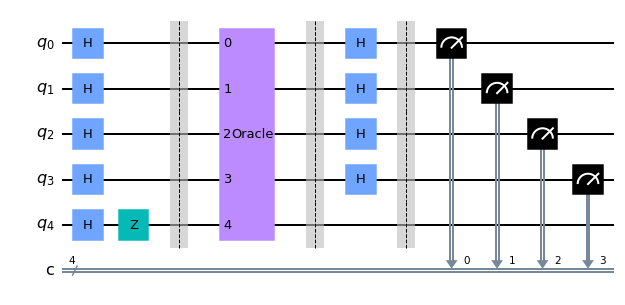

In [4]:
n = 4
oracle_gate = Bv_oracle(n)
bv_circuit = bv_circuit(oracle_gate, n)
bv_circuit.draw(output = 'mpl')

### Result on a simulator

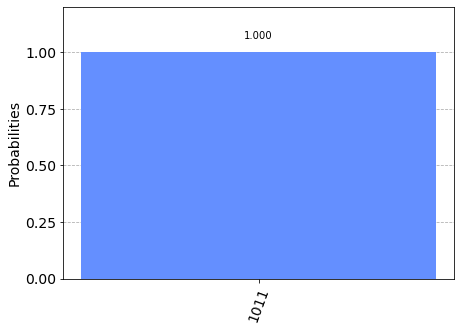

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_bv_circuit = transpile(bv_circuit, aer_sim)
qobj = assemble(transpiled_bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

finally we are getting our randomly generated string with hundred percent probability.

### Experiment with real device

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_quito')
job = execute(bv_circuit, backend = qcomp)

ibmqfactory.load_account:WARNING:2021-09-18 12:27:45,660: Credentials are already in use. The existing account in the session will be replaced.


In [8]:
from qiskit.tools.monitor import job_monitor
# to monitor the execution of job in the queue
job_monitor(job, interval = 2)

Job Status: job has successfully run


'"\nshots = 1024\ntranspiled_bv_circuit = transpile(bv_circuit, backend, optimization_level = 3)\njob = backend.run(transpiled_bv_circuit)\njob_monitor(job, interval = 2)'

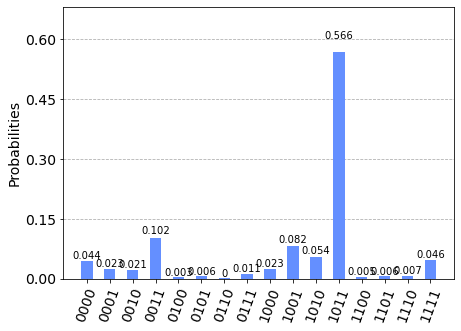

In [9]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

So finally as expected we get the result string 1011 with max probability as expected.We re getting results for other strings because of errors in quantum computing.